In [55]:
# Challenge 1 - Independent Sample T-tests

import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt

pokemon = pd.read_csv('/Users/valaba/Desktop/pokemon.csv')

pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [56]:
pokemon["Legendary"].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [57]:
#Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

pokemon.groupby("Legendary")["Total"].mean()

Legendary
False    417.213605
True     637.384615
Name: Total, dtype: float64

In [58]:
pokemon.groupby("Legendary")["Total"].std()

Legendary
False    106.760417
True      60.937389
Name: Total, dtype: float64

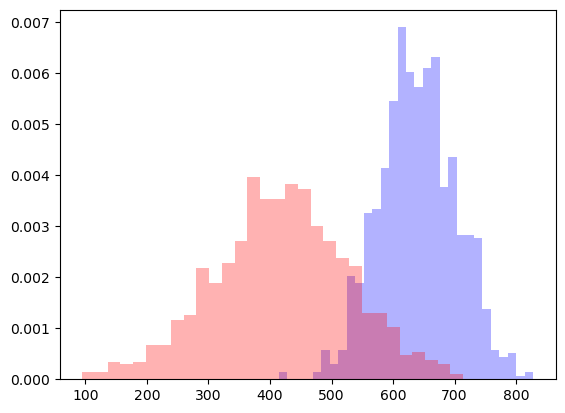

In [59]:
# For legendary Pokemon
s_legendary = np.random.normal(637.384615, 60.937389, 1000)
s_non_legendary = np.random.normal(417.213605, 106.760417, 1000)

plt.hist(s_legendary, alpha=.3, color='blue', bins=30, density=True);
plt.hist(s_non_legendary, alpha=.3, color='red', bins=30, density=True);

In [60]:
stats.ttest_ind(s_legendary, s_non_legendary, equal_var = False)

Ttest_indResult(statistic=55.74975565500665, pvalue=0.0)

In [61]:
# The pvalue may equal to 0.00005 which means very low, 
# so we can reject the null hypothesis that the variances are not equal. They refer to be equal.

In [62]:
pokemon["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [63]:
# Since water is the largest group of Pokemon, 
# compare the mean and standard deviation of water Pokemon to all other Pokemon.

mean_type = pokemon.groupby("Type 1")["Total"].mean().sort_values(ascending = False)

In [64]:
std_type = pokemon.groupby("Type 1")["Total"].std().sort_values(ascending = False)

In [65]:
# Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon.
# Assume the variances are equal.

pd.DataFrame({'mean': mean_type, 'std': std_type})

,mean,std
Type 1,,
Bug,378.927536,117.875223
Dark,445.741935,109.126217
Dragon,550.531250,146.267538
Electric,443.409091,105.721952
Fairy,413.176471,123.781680
Fighting,416.444444,102.464378
Fire,458.076923,109.760496
Flying,485.000000,161.400124
Ghost,439.562500,110.072685


In [66]:
po_water = pokemon.loc[pokemon["Type 1"] == "Water"]["Total"].sum()
po_water

48211

In [67]:
po_non_water = pokemon.loc[pokemon["Type 1"] != "Water"]["Total"].sum()
po_non_water

299871

In [69]:
stats.ttest_ind(48211,299871).pvalue

/var/folders/hz/wdxy33c549592d70h0kdzm8c0000gn/T/ipykernel_17030/1547339258.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(48211,299871).pvalue


nan